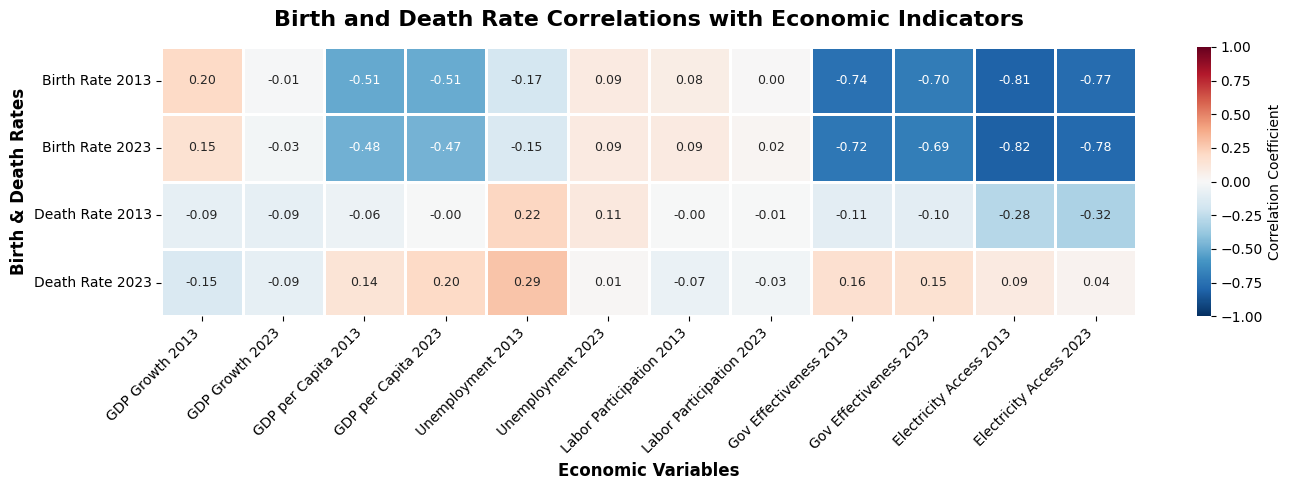


Correlation heatmap created successfully!
Showing 4 birth/death variables
Against 12 economic variables


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('world_data_clean.csv')

# Select the columns we want - birth/death rates and economic variables
columns_to_use = [
    'birth_rate_2013', 'birth_rate_2023',
    'death_rate_2013', 'death_rate_2023',
    'gdp_growth_2013', 'gdp_growth_2023',
    'gdp_pc_2013', 'gdp_pc_2023',
    'unemp_2013', 'unemp_2023',
    'labor_part_2013', 'labor_part_2023',
    'gov_eff_2013', 'gov_eff_2023',
    'elec_2013', 'elec_2023'
]

# Convert string columns to numeric (some GDP columns might be strings)
for col in columns_to_use:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create subset with just these columns
data_subset = df[columns_to_use].copy()

# Rename columns for better presentation
data_subset.columns = [
    'Birth Rate 2013', 'Birth Rate 2023',
    'Death Rate 2013', 'Death Rate 2023',
    'GDP Growth 2013', 'GDP Growth 2023',
    'GDP per Capita 2013', 'GDP per Capita 2023',
    'Unemployment 2013', 'Unemployment 2023',
    'Labor Participation 2013', 'Labor Participation 2023',
    'Gov Effectiveness 2013', 'Gov Effectiveness 2023',
    'Electricity Access 2013', 'Electricity Access 2023'
]

# Calculate correlation matrix
corr_matrix = data_subset.corr()

# Extract just the rows we want (birth and death rates)
birth_death_rows = ['Birth Rate 2013', 'Birth Rate 2023', 'Death Rate 2013', 'Death Rate 2023']

# And columns we want (economic variables only)
economic_cols = [col for col in data_subset.columns if col not in birth_death_rows]

# Get the subset of correlations
final_corr = corr_matrix.loc[birth_death_rows, economic_cols]

# Create the heatmap
fig, ax = plt.subplots(figsize=(14, 5))

sns.heatmap(final_corr,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            square=False,
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1,
            vmax=1,
            annot_kws={'size': 9})

plt.title('Birth and Death Rate Correlations with Economic Indicators',
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Economic Variables', fontsize=12, fontweight='bold')
plt.ylabel('Birth & Death Rates', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('birth_death_economic_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrelation heatmap created successfully!")
print(f"Showing {len(birth_death_rows)} birth/death variables")
print(f"Against {len(economic_cols)} economic variables")